## Analysing Ad Budgets for different media channels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance
%matplotlib inline

In [2]:
advert = pd.read_csv('Advertising Budget and Sales.csv')
advert.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advert = pd.read_csv('Advertising Budget and Sales.csv',index_col=0)
advert.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
advert.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
advert.size

800

In [6]:
advert.shape

(200, 4)

In [7]:
advert.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [8]:
# X = advert.iloc[:, :-1].values
# y = advert.iloc[:, 3:4].values
X  = advert[['TV Ad Budget ($)','Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = advert['Sales ($)']

C:\Users\maryam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales ($)', ylabel='Density'>

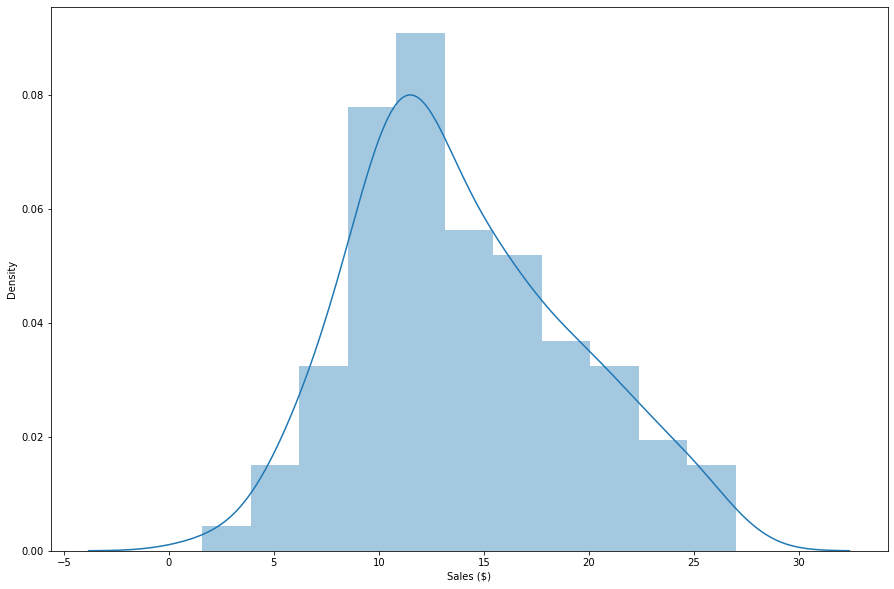

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(advert['Sales ($)'])

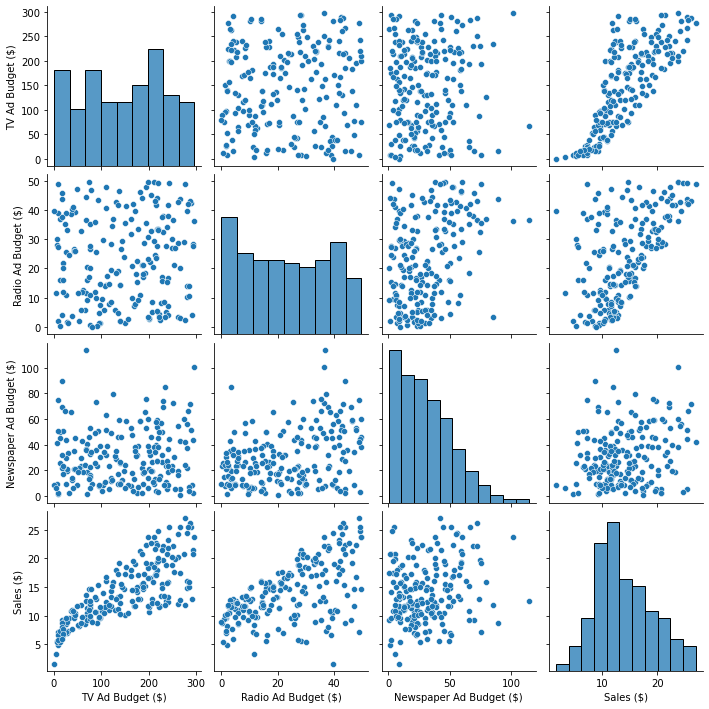

In [10]:
sns.pairplot(advert)

<AxesSubplot:>

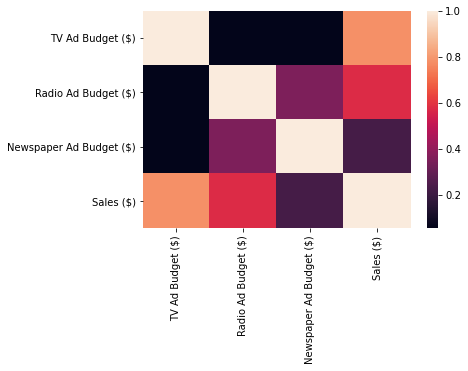

In [11]:
sns.heatmap(advert.corr())

In [12]:
advert.corr()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


## LINEAR REGRESSION

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [15]:
X_train.shape

(140, 3)

In [16]:
X_test.shape

(60, 3)

In [17]:
y_train.shape

(140,)

In [18]:
y_test.shape

(60,)

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = lm.predict(X_test)
y_pred

array([10.05866652,  7.43318827,  6.95305695, 24.16874598, 11.98172029,
        6.54464708, 13.19426793, 14.90240334, 11.07675294, 16.25061663,
       23.0081158 ,  9.12072148, 10.29342297, 15.3709661 , 11.62396513,
       12.1057432 , 18.55030805, 10.85810888, 16.13879856, 17.20281404,
       24.25469939,  9.43869821, 15.13419408, 12.41283844,  5.66973859,
       15.23876681, 12.1878762 , 20.95164149, 13.22671807,  9.20954724,
       13.39812727, 21.61944517, 18.05938674, 21.14798547,  6.73582996,
        6.16799717,  7.98042607, 13.09083488, 14.86214078,  6.23597127,
       12.35246911,  9.19452235, 15.04717679, 16.23039254, 17.17240889,
       13.3341216 ,  3.68035786, 12.53946851, 15.93674769,  8.67881357,
       10.62459997, 19.5646526 , 18.3472282 , 15.24662975, 10.04846378,
        8.17344188, 21.49061088, 14.137309  , 16.29760212,  8.90502274])

In [21]:
# this doesn't work for series. Refer to the commented part in line 7. if our X were difined that way then this code would work.
# df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
# df

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
19,11.3,10.058667
171,8.4,7.433188
108,8.7,6.953057
99,25.4,24.168746
178,11.7,11.981720
183,8.7,6.544647
6,7.2,13.194268
147,13.2,14.902403
13,9.2,11.076753
153,16.6,16.250617


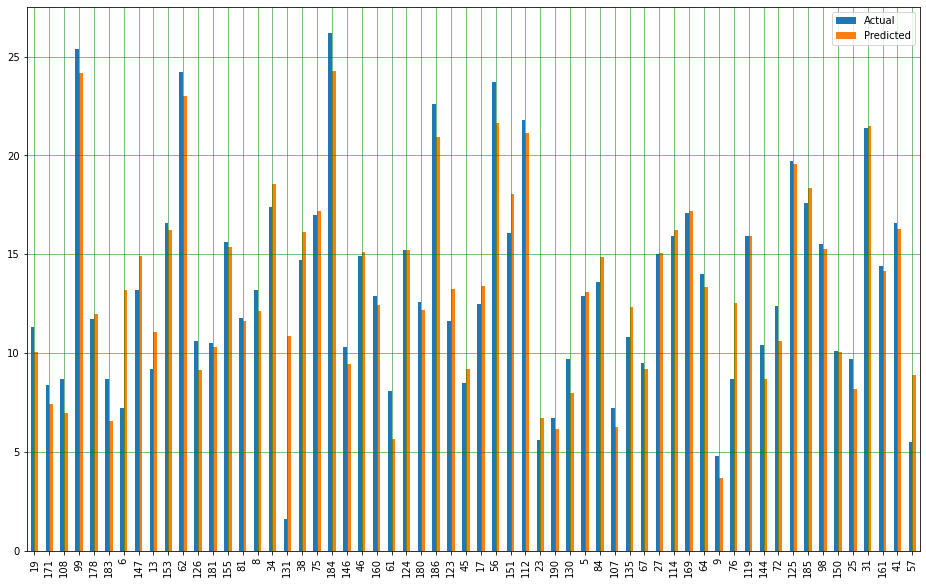

In [23]:
# a graph showing the predicted values against there actual values for LINEAR REGRESSION
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

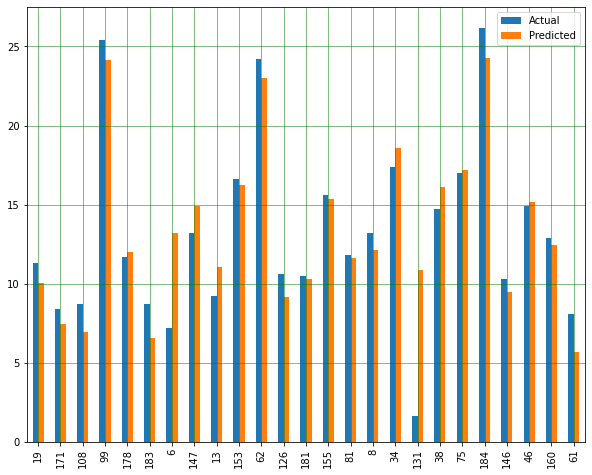

In [24]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print(lm.coef_)

[0.04391531 0.20027962 0.00184368]


In [26]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV Ad Budget ($),0.043915
Radio Ad Budget ($),0.200280
Newspaper Ad Budget ($),0.001844


### This means that for a unit increase in "TV AD Budget", there is an increase of 4.4 dollars in sales consumption.
### NewsPaper Ad has a very little impact on sales

In [27]:
print(lm.intercept_)

2.8802552863313284


In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8649018906637793

In [29]:
from sklearn import metrics

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2333759522850198
Mean Squared Error: 3.6913948456986057
Root Mean Squared Error: 1.9213003007595157


## RANDOM FOREST REGRESSOR

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [32]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [33]:
pred = regressor.predict(X_train)

In [34]:
y_predd = regressor.predict(X_test)
y_predd

array([10.72,  9.69,  9.61, 25.19, 12.69,  8.91,  8.68, 12.78,  9.12,
       15.9 , 24.17, 10.34, 10.76, 14.72, 11.45, 12.65, 15.47,  7.41,
       13.75, 16.4 , 25.24, 10.41, 15.32, 12.64,  8.84, 14.27, 14.26,
       22.01, 11.37,  7.38, 12.82, 23.16, 15.3 , 22.17,  6.3 ,  6.53,
       10.12, 14.05, 13.15,  7.06, 10.34,  7.41, 17.36, 15.12, 15.93,
       12.2 ,  5.58,  9.25, 15.01, 10.36, 11.67, 20.46, 15.86, 14.72,
        9.92,  9.7 , 21.  , 14.68, 15.36,  6.43])

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predd)

0.9501398810622116

In [36]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
dff.head(10)

,Actual,Predicted
19,11.3,10.72
171,8.4,9.69
108,8.7,9.61
99,25.4,25.19
178,11.7,12.69
183,8.7,8.91
6,7.2,8.68
147,13.2,12.78
13,9.2,9.12
153,16.6,15.90


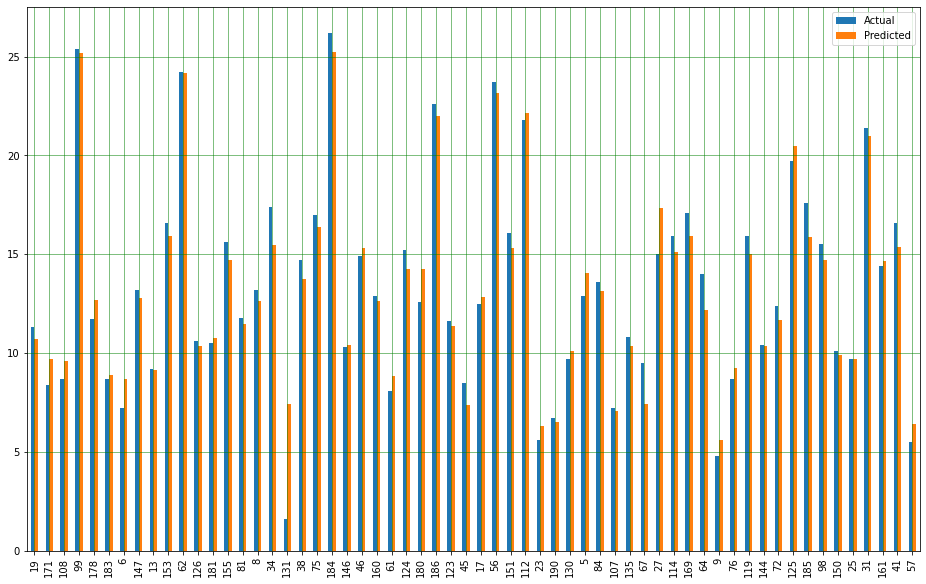

In [37]:
# a graph showing the predicted values against there actual values for RANDOM FOREST REGRESSOR
dff.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [38]:
# combining the predicted values for linear regression model and random forest regressor model
combo = pd.concat([df, dff], axis=1)
combo.head(10)

,Actual,Predicted,Actual,Predicted
19,11.3,10.058667,11.3,10.72
171,8.4,7.433188,8.4,9.69
108,8.7,6.953057,8.7,9.61
99,25.4,24.168746,25.4,25.19
178,11.7,11.981720,11.7,12.69
183,8.7,6.544647,8.7,8.91
6,7.2,13.194268,7.2,8.68
147,13.2,14.902403,13.2,12.78
13,9.2,11.076753,9.2,9.12
153,16.6,16.250617,16.6,15.90


In [39]:
# compairing the predicted values for linear regression model and random forest regressor model
# Predicted_x is the predicted value for LINEAR REGRESSION
# Predicted_y is the predicted value for RANDOM FOREST REGRESSOR
combo = pd.merge(df, dff, how='right',on=['Actual'])
combo

,Actual,Predicted_x,Predicted_y
0,11.3,10.058667,10.72
1,8.4,7.433188,9.69
2,8.7,6.953057,9.61
3,8.7,6.544647,9.61
4,8.7,12.539469,9.61
...,...,...,...
73,21.4,21.490611,21.00
74,14.4,14.137309,14.68
75,16.6,16.250617,15.36
76,16.6,16.297602,15.36


In [40]:
# to remove the broken lines and display all
pd.set_option('display.max_rows', combo.shape[0]+1)
combo

,Actual,Predicted_x,Predicted_y
0,11.3,10.058667,10.72
1,8.4,7.433188,9.69
2,8.7,6.953057,9.61
3,8.7,6.544647,9.61
4,8.7,12.539469,9.61
5,25.4,24.168746,25.19
6,11.7,11.981720,12.69
7,8.7,6.953057,8.91
8,8.7,6.544647,8.91
9,8.7,12.539469,8.91


In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predd))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predd))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predd)))

Mean Absolute Error: 0.808833333333333
Mean Squared Error: 1.362368333333333
Root Mean Squared Error: 1.1672053518268894
